In [1]:
pip install meteostat

Note: you may need to restart the kernel to use updated packages.


In [1]:
import meteostat

https://dev.meteostat.net/python/#installation

In [2]:
#Attempting to get to weather stations as a list: 
import requests

url = 'https://meteostat.p.rapidapi.com/stations/daily'

headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2d597b87a9mshc4501f1dfa26546p18b291jsn2d605ade9889'  # Replace {your_api_key} with your actual API key
}
params = {
    'station': '10637',
    'start': '2020-01-01',
    'end': '2020-01-01'
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    data = response.json()
    # Process the data as needed
    print(data)
else:
    print('Error:', response.status_code)


Error: 403


In [3]:
import os
from dotenv import load_dotenv
import requests

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# Define the API endpoint and parameters
url = 'https://meteostat.p.rapidapi.com/stations/daily'
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': api_key
}
params = {
    'station': '10637',
    'start': '2020-01-01',
    'end': '2020-01-01'
}

# Send request to the API
response = requests.get(url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Process the data as needed
    print(data)
else:
    print('Error:', response.status_code)


Error: 403


In [4]:
#Attempting to get to weather stations as DF 
import requests
import pandas as pd

url = 'https://meteostat.p.rapidapi.com/stations/daily'
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'  # Replace {your_api_key} with your actual API key
}
params = {
    'station': '10637',
    'start': '2020-01-01',
    'end': '2020-01-11'
}

# Make the API request
response = requests.get(url, headers=headers, params=params)

# Extract JSON data from the response
json_data = response.json()

# Normalize the JSON data into a DataFrame
weather_df = pd.json_normalize(json_data['data'], 
                               record_path=None, 
                               meta=['meta'])

# Print or use the DataFrame as needed
weather_df


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-01-01,0.4,-3.6,4.5,0.1,0.0,47.0,10.1,22.3,1035.5,438
1,2020-01-02,-0.5,-2.4,1.4,0.0,0.0,198.0,6.1,25.9,1031.2,0
2,2020-01-03,5.8,1.3,9.3,0.5,0.0,209.0,15.5,46.8,1024.4,0
3,2020-01-04,5.4,2.4,6.8,0.2,0.0,242.0,15.8,47.5,1031.5,0
4,2020-01-05,4.8,2.7,6.3,1.1,0.0,189.0,6.8,23.4,1036.6,0
5,2020-01-06,1.1,-0.9,4.6,0.0,0.0,198.0,6.5,19.8,1030.6,0
6,2020-01-07,3.4,-0.1,8.0,0.0,0.0,198.0,9.7,22.3,1029.9,168
7,2020-01-08,4.9,2.8,7.5,10.6,0.0,197.0,11.9,27.7,1028.9,0
8,2020-01-09,9.2,7.4,11.2,8.6,0.0,191.0,11.5,29.5,1019.9,0
9,2020-01-10,8.3,4.0,11.6,2.1,0.0,222.0,15.8,44.3,1021.6,168


Follow this for API key: 
https://rapidapi.com/developer/authorization/default-application_9067818

In [7]:
# Import Meteostat library
from meteostat import Stations

# Example usage
latitude = 38.9445
longitude = -77.4558

# Get nearby weather stations
stations = Stations()
stations = stations.nearby(latitude, longitude)
station = stations.fetch(1)

# Print DataFrame
print(station)

                               name country region    wmo  icao  latitude  \
id                                                                          
72403  Dulles International Airport      US     VA  72403  KIAD   38.9333   

       longitude  elevation          timezone hourly_start hourly_end  \
id                                                                      
72403     -77.45       95.0  America/New_York   1973-01-01 2024-05-07   

      daily_start  daily_end monthly_start monthly_end     distance  
id                                                                   
72403  1960-04-01 2024-12-30    1961-01-01  2022-01-01  1342.616722  


In [8]:
IAD = Point(38.9445, -77.4558, 95)
BWI = Point(39.1774, -76.6684, 146)
PHL = Point(39.8721, -75.2431, 36)
EWR = Point(40.6895, -74.1745, 18)
JFK = Point(40.6413, -73.7781, 13)
LGA = Point(40.7769, -73.874, 21)

NameError: name 'Point' is not defined

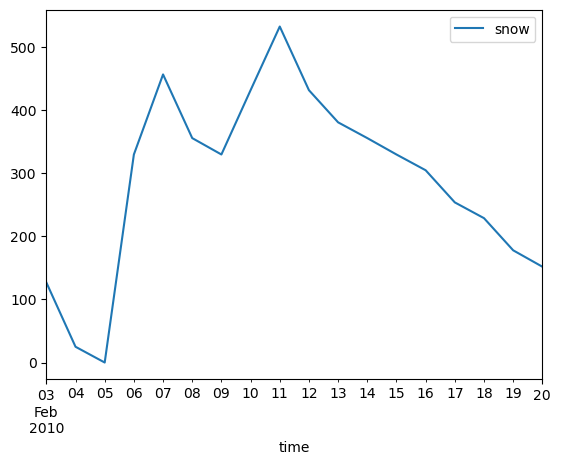

In [8]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2010, 2, 3)
end = datetime(2010, 2, 20)

# Create Point for Vancouver, BC
DCA = Point(38.8521, -77.0377, 0)

# Get daily data for 2018
data = Daily(DCA, start, end)
data = data.fetch()
data
# Plot line chart for snowgit
data.plot(y=['snow'])
plt.show()

In [ ]:
#Attempting to get to weather stations as DF 
import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72403', '72406', '72408', 'KLDJ0', '74486', 'KNYC0' ] #Insert IDs here

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-15'
    }

# Define the API endpoint and parameters
url = 'https://meteostat.p.rapidapi.com/stations/daily' #First try
#url = 'https://meteostat.p.rapidapi.com/point/hourly'#Second try

#Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': api_key
}

# Make the API request
response = requests.get(url, headers=headers, params=params)

# Extract JSON data from the response
json_data = response.json()

# Normalize the JSON data into a DataFrame
weather_df = pd.json_normalize(json_data['data'], 
                               record_path=None, 
                               meta=['meta'])

# Print or use the DataFrame as needed
weather_df

In [3]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

# Retrieve API key from environment variable
api_key = os.getenv('rapid_api_key')

# List of station IDs
station_ids = ['72403', '72406', '72408', 'KLDJ0', '74486', 'KNYC0']  # Insert IDs here

# List to store DataFrames for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': '2010-02-01',
        'end': '2010-02-15'
    }

    # Define the API endpoint and headers
    url = 'https://meteostat.p.rapidapi.com/stations/daily'
    headers = {
        'x-rapidapi-host': 'meteostat.p.rapidapi.com',
        'x-rapidapi-key': api_key
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()

        # Normalize the JSON data into a DataFrame
        weather_df = pd.json_normalize(json_data['data'], record_path=None, meta=['meta'])

        # Add station_id column
        weather_df['station_id'] = station_id

        # Append the DataFrame to the list
        dfs.append(weather_df)
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Concatenate all DataFrames in the list into a single DataFrame
final_weather_df = pd.concat(dfs, ignore_index=True)

# Print the DataFrame
print(final_weather_df)

Failed to retrieve data for station ID: 72403
Failed to retrieve data for station ID: 72406
Failed to retrieve data for station ID: 72408
Failed to retrieve data for station ID: KLDJ0
Failed to retrieve data for station ID: 74486
Failed to retrieve data for station ID: KNYC0


ValueError: No objects to concatenate

In [4]:
import requests
import pandas as pd

# Define the API endpoint and parameters
url = 'https://meteostat.p.rapidapi.com/stations/daily'
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'  # Replace {your_api_key} with your actual API key
}

# List of station IDs
station_ids = ['72403', '72406', '72408', 'KLDJ0', '74486', 'KNYC0']

# Define parameters for the date range
start_date = '2020-01-01'
end_date = '2020-01-11'

# Initialize an empty list to store dataframes for each station
dfs = []

# Iterate over each station
for station_id in station_ids:
    # Define parameters for the current station
    params = {
        'station': station_id,
        'start': start_date,
        'end': end_date
    }

    # Make the API request
    response = requests.get(url, headers=headers, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Extract JSON data from the response
        json_data = response.json()
        
        # Check if data is available
        if 'data' in json_data:
            # Normalize the JSON data into a DataFrame
            weather_df = pd.json_normalize(json_data['data'])
            
            # Add station ID as a column in the DataFrame
            weather_df['station_id'] = station_id
            
            # Append the DataFrame to the list
            dfs.append(weather_df)
        else:
            print(f"No data available for station ID: {station_id}")
    else:
        print(f"Failed to retrieve data for station ID: {station_id}")

# Check if there are any DataFrames to concatenate
if dfs:
    # Concatenate all DataFrames in the list into a single DataFrame
    final_weather_df = pd.concat(dfs, ignore_index=True)
    
    # Print the DataFrame
    print(final_weather_df)
else:
    print("No data available for any station.")


Failed to retrieve data for station ID: KLDJ0
Failed to retrieve data for station ID: 74486
Failed to retrieve data for station ID: KNYC0
          date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun  \
0   2020-01-01   6.1  -3.2  10.0   0.0   0.0  312.0  10.4  None  1010.6  None   
1   2020-01-02   1.6  -4.9  10.6   0.0   0.0  174.0   8.3  None  1013.8  None   
2   2020-01-03   9.4   7.2  11.7   8.4   0.0  186.0   7.9  None  1009.8  None   
3   2020-01-04  11.3   6.1  14.4   8.9   0.0  335.0  10.8  None  1004.6  None   
4   2020-01-05   4.9  -2.7   6.1   0.0   0.0  315.0  19.8  None  1015.9  None   
5   2020-01-06   3.4  -2.7  11.7   0.0   0.0  252.0  11.9  None  1017.3  None   
6   2020-01-07   0.7  -3.2   4.4   8.1   0.0  322.0   7.9  None  1016.5  None   
7   2020-01-08   0.6  -3.8   6.1   0.0  50.0  253.0  15.1  None  1021.3  None   
8   2020-01-09  -0.3  -4.3   3.9   0.0   0.0  104.0  11.2  None  1038.6  None   
9   2020-01-10   4.8   1.1  13.3   0.0   0.0  182.0 

In [9]:
#Attempting to get to hourly data 
import os
from dotenv import load_dotenv
import requests
import pandas as pd

# Load environment variables from .env file
load_dotenv()

headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'  # Replace {your_api_key} with your actual API key
}

# Retrieve API key from environment variable
#api_key = os.getenv('x-rapid_api_key')

In [10]:
import requests

# Define the parameters
parameters = {
    'lat': '38.9554',
    'lon': '-77.4558',
    'start': '2010-02-06',
    'end': '2010-02-06',
}

# Define the API endpoint
url = 'https://meteostat.p.rapidapi.com/point/hourly'

# Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'
}

# Make the API request
response = requests.get(url, headers=headers, params=parameters)

# Check if the request was successful
if response.status_code == 200:
    # Extract JSON data from the response
    weather_hourly = response.json()
    
    # Print the JSON data
    print(weather_hourly)
else:
    print("Failed to retrieve data. Status code:", response.status_code)


{'meta': {'generated': '2024-05-08 09:23:25', 'stations': ['72403', 'KJYO0', 'KHEF0', 'KHWY0']}, 'data': [{'time': '2010-02-06 00:00:00', 'temp': 0.0, 'dwpt': -1.1, 'rhum': 92.0, 'prcp': 2.5, 'snow': None, 'wdir': 60.0, 'wspd': 18.4, 'wpgt': None, 'pres': 1014.4, 'tsun': None, 'coco': None}, {'time': '2010-02-06 01:00:00', 'temp': 0.0, 'dwpt': -1.1, 'rhum': 92.0, 'prcp': 2.8, 'snow': None, 'wdir': 70.0, 'wspd': 20.5, 'wpgt': None, 'pres': 1012.0, 'tsun': None, 'coco': None}, {'time': '2010-02-06 02:00:00', 'temp': 0.0, 'dwpt': -1.1, 'rhum': 92.0, 'prcp': 2.3, 'snow': None, 'wdir': 60.0, 'wspd': 20.5, 'wpgt': None, 'pres': 1010.9, 'tsun': None, 'coco': None}, {'time': '2010-02-06 03:00:00', 'temp': 0.0, 'dwpt': -1.8, 'rhum': 88.0, 'prcp': 2.5, 'snow': None, 'wdir': 60.0, 'wspd': 25.9, 'wpgt': None, 'pres': 1008.8, 'tsun': None, 'coco': None}, {'time': '2010-02-06 04:00:00', 'temp': 0.0, 'dwpt': -1.8, 'rhum': 88.0, 'prcp': 2.0, 'snow': None, 'wdir': 60.0, 'wspd': 27.7, 'wpgt': None, 'pre

In [11]:
import requests
import pandas as pd

# Define the parameters
parameters = {
    'lat': '38.9554',
    'lon': '-77.4558',
    'start': '2010-02-06',
    'end': '2010-02-06',
}

# Define the API endpoint
url = 'https://meteostat.p.rapidapi.com/point/hourly'

# Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'
}

# Make the API request
response = requests.get(url, headers=headers, params=parameters)

# Check if the request was successful
if response.status_code == 200:
    # Extract JSON data from the response
    weather_hourly = response.json()
    
    # Check if data is available
    if 'data' in weather_hourly:
        # Normalize the JSON data into a DataFrame
        df = pd.DataFrame(weather_hourly['data'])
        
        # Print the DataFrame
        print(df)
    else:
        print("No data available.")
else:
    print("Failed to retrieve data. Status code:", response.status_code)


                   time  temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt  \
0   2010-02-06 00:00:00   0.0  -1.1  92.0   2.5  None   60.0  18.4  None   
1   2010-02-06 01:00:00   0.0  -1.1  92.0   2.8  None   70.0  20.5  None   
2   2010-02-06 02:00:00   0.0  -1.1  92.0   2.3  None   60.0  20.5  None   
3   2010-02-06 03:00:00   0.0  -1.8  88.0   2.5  None   60.0  25.9  None   
4   2010-02-06 04:00:00   0.0  -1.8  88.0   2.0  None   60.0  27.7  None   
5   2010-02-06 05:00:00  -0.6  -1.7  92.0   2.5  None   60.0  33.5  None   
6   2010-02-06 06:00:00  -0.6  -1.7  92.0   2.3  None   40.0  29.5  None   
7   2010-02-06 07:00:00  -0.6  -1.7  92.0   3.0  None   30.0  18.4  None   
8   2010-02-06 08:00:00  -0.6  -2.2  89.0   0.8  None   40.0  29.5  None   
9   2010-02-06 09:00:00  -1.1  -2.2  92.0   1.5  None   10.0  13.0  None   
10  2010-02-06 10:00:00  -1.1  -2.8  88.0   2.0  None  360.0  14.8  None   
11  2010-02-06 11:00:00  -1.1  -2.8  88.0   1.5  None   20.0  18.4  None   
12  2010-02-

In [18]:
import requests
import pandas as pd

# Define the parameters
parameters = {
    'lat': '38.9554',
    'lon': '-77.4558',
    'start': '2010-02-06',
    'end': '2010-02-06',
}

# Define the API endpoint
url = 'https://meteostat.p.rapidapi.com/point/hourly'

# Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'
}

# Make the API request
response = requests.get(url, headers=headers, params=parameters)

# Check if the request was successful
if response.status_code == 200:
    # Extract JSON data from the response
    weather_hourly = response.json()
    
    # Check if data is available
    if 'data' in weather_hourly:
        # Normalize the JSON data into a DataFrame
        df = pd.json_normalize(weather_hourly['data'])
        
        # Select only the desired columns
        df = df[['time','temp', 'wdir', 'wspd']]
        
        # Print the DataFrame
        print(df)
    else:
        print("No data available.")
else:
    print("Failed to retrieve data. Status code:", response.status_code)


                   time  temp   wdir  wspd
0   2010-02-06 00:00:00   0.0   60.0  18.4
1   2010-02-06 01:00:00   0.0   70.0  20.5
2   2010-02-06 02:00:00   0.0   60.0  20.5
3   2010-02-06 03:00:00   0.0   60.0  25.9
4   2010-02-06 04:00:00   0.0   60.0  27.7
5   2010-02-06 05:00:00  -0.6   60.0  33.5
6   2010-02-06 06:00:00  -0.6   40.0  29.5
7   2010-02-06 07:00:00  -0.6   30.0  18.4
8   2010-02-06 08:00:00  -0.6   40.0  29.5
9   2010-02-06 09:00:00  -1.1   10.0  13.0
10  2010-02-06 10:00:00  -1.1  360.0  14.8
11  2010-02-06 11:00:00  -1.1   20.0  18.4
12  2010-02-06 12:00:00  -1.7   10.0  22.3
13  2010-02-06 13:00:00  -1.7  350.0  20.5
14  2010-02-06 14:00:00  -1.7  350.0  27.7
15  2010-02-06 15:00:00  -2.2  350.0  20.5
16  2010-02-06 16:00:00  -2.2  350.0  27.7
17  2010-02-06 17:00:00  -3.3  350.0  25.9
18  2010-02-06 18:00:00  -2.8  350.0  14.8
19  2010-02-06 19:00:00  -2.8  360.0  25.9
20  2010-02-06 20:00:00  -3.3  360.0  24.1
21  2010-02-06 21:00:00  -2.8  340.0  11.2
22  2010-02

In [19]:
import requests
import pandas as pd

# Define the parameters
parameters = {
    'lat': '38.9554',
    'lon': '-77.4558',
    'start': '2010-02-06',
    'end': '2010-02-10',
}

# Define the API endpoint
url = 'https://meteostat.p.rapidapi.com/point/hourly'

# Define headers for the request
headers = {
    'x-rapidapi-host': 'meteostat.p.rapidapi.com',
    'x-rapidapi-key': '2a4c4f60fdmshff28636b9a3f8c0p18f5f5jsn3b317a6c373b'
}

# Make the API request
response = requests.get(url, headers=headers, params=parameters)

# Check if the request was successful
if response.status_code == 200:
    # Extract JSON data from the response
    weather_hourly = response.json()
    
    # Check if data is available
    if 'data' in weather_hourly:
        # Normalize the JSON data into a DataFrame
        df = pd.json_normalize(weather_hourly['data'])
        
        # Convert time to datetime
        df['time'] = pd.to_datetime(df['time'])
        
        # Round time to nearest 4-hour interval
        df['time'] = df['time'].dt.round('4H')
        
        # Group data by 4-hour intervals and aggregate
        df_agg = df.groupby(pd.Grouper(key='time', freq='4H')).agg({
            'temp': 'mean',  # mean temperature
            'wdir': 'mean',  # mean wind direction
            'wspd': 'mean'   # mean wind speed
        }).reset_index()
        
        # Print the aggregated DataFrame
        print(df_agg)
    else:
        print("No data available.")
else:
    print("Failed to retrieve data. Status code:", response.status_code)


                  time       temp        wdir       wspd
0  2010-02-06 00:00:00   0.000000   63.333333  19.800000
1  2010-02-06 04:00:00  -0.200000   60.000000  29.033333
2  2010-02-06 08:00:00  -0.800000   96.000000  21.040000
3  2010-02-06 12:00:00  -1.500000  126.666667  20.400000
4  2010-02-06 16:00:00  -2.440000  350.000000  23.320000
5  2010-02-06 20:00:00  -2.966667  353.333333  20.400000
6  2010-02-07 00:00:00  -5.060000  322.000000   9.040000
7  2010-02-07 04:00:00  -8.333333  340.000000   6.266667
8  2010-02-07 08:00:00 -10.100000  324.000000   9.960000
9  2010-02-07 12:00:00  -8.866667  333.333333  14.800000
10 2010-02-07 16:00:00  -4.660000  328.000000  17.320000
11 2010-02-07 20:00:00  -1.666667  300.000000  11.200000
12 2010-02-08 00:00:00  -4.240000  298.000000   9.680000
13 2010-02-08 04:00:00  -4.633333  326.666667  13.000000
14 2010-02-08 08:00:00  -8.020000  302.000000  12.980000
15 2010-02-08 12:00:00  -7.966667  330.000000   6.133333
16 2010-02-08 16:00:00  -3.3200